(time_series_with_matrices)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# 用矩阵代数表示的单变量时间序列

## 概述

本讲使用矩阵来解决一些线性差分方程。

作为一个实际例子，我们将研究一个保罗·萨缪尔森 1939 年文章 {cite}`Samuelson1939` 中的**二阶线性差分方程**，该文章引入了**乘数加速器**模型。

该模型推动了早期美国凯恩斯主义宏观经济模型的计量经济版本。

你可以在{doc}`intermediate:samuelson`中阅读该模型的详细信息。

（该讲座还描述了一些关于二阶线性差分方程的细节。）

在本讲座中，我们还将了解一个非平稳单变量时间序列 $\{y_t\}_{t=0}^T$ 的**自回归**表达和**移动平均**表达。

我们还将研究一个涉及解“前瞻性”线性差分方程的“完美預期”股票价格模型。

我们将使用以下导入：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 设置默认图形大小
plt.rcParams["figure.figsize"] = (11, 5)

# 设置打印的浮点数精度
np.set_printoptions(precision=3, suppress=True)

## 萨缪尔森的模型

设 $t = 0, \pm 1, \pm 2, \ldots$ 为时间。

对于 $t=1, 2, 3, \ldots, T$，假设

```{math}
:label: tswm_1

y_{t} = \alpha_{0} + \alpha_{1} y_{t-1} + \alpha_{2} y_{t-2}
```

我们假设 $y_0$ 和 $y_{-1}$ 是给定的数字，我们将其作为**初始条件**。

在萨缪尔森的模型中，$y_t$ 表示 **国民收入** 或者 **国内生产总值**（GDP）在时间 $t$ 的测量值。

方程 {eq}`tswm_1` 称为 **二阶线性差分方程**，因为它包含了两个滞后值。

实际上，它是 $T$ 个关于 $T$ 个变量 $y_1, y_2, \ldots, y_T$ 的线性方程的集合。

```{note}
为了能够解决一个二阶线性差分方程，我们需要两个**边界条件**，它们可以采取两种**初始条件**或两种**终端条件**或可能是每种一种的形式。
```

我们将方程写成堆叠系统

$$
\underset{\equiv A}{\underbrace{\left[\begin{array}{cccccccc}
1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{1} & 1 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{2} & -\alpha_{1} & 1 & 0 & \cdots & 0 & 0 & 0\\
0 & -\alpha_{2} & -\alpha_{1} & 1 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & -\alpha_{2} & -\alpha_{1} & 1
\end{array}\right]}}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
y_{4}\\
\vdots\\
y_{T}
\end{array}\right]=\underset{\equiv b}{\underbrace{\left[\begin{array}{c}
\alpha_{0}+\alpha_{1}y_{0}+\alpha_{2}y_{-1}\\
\alpha_{0}+\alpha_{2}y_{0}\\
\alpha_{0}\\
\alpha_{0}\\
\vdots\\
\alpha_{0}
\end{array}\right]}}
$$

或者

$$
A y = b
$$

其中

$$
y = \begin{bmatrix} y_1 \cr y_2 \cr \vdots \cr y_T \end{bmatrix}
$$

显然，$y$ 可以由以下公式计算得出

$$
y = A^{-1} b
$$

向量 $y$ 是完整的时间路径 $\{y_t\}_{t=1}^T$。

我们用 Python 来实现一个例子来展现萨缪尔森乘数-加速器模型的基本思想。

我们将参数设置为与讲{doc}`intermediate:samuelson`中使用的值相同。

In [2]:
T = 80

# 参数
α_0 = 10.0
α_1 = 1.53
α_2 = -.9

y_neg1 = 28.0 # y_{-1}
y_0 = 24.0

现在我们构造 $A$ 和 $b$。

In [3]:
A = np.identity(T)  # T x T 的单位矩阵

for i in range(T):

    if i-1 >= 0:
        A[i, i-1] = -α_1

    if i-2 >= 0:
        A[i, i-2] = -α_2

b = np.full(T, α_0)
b[0] = α_0 + α_1 * y_0 + α_2 * y_neg1
b[1] = α_0 + α_2 * y_0

让我们来看看我们的例子中的矩阵 $A$ 和向量 $b$。

In [4]:
A, b

(array([[ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [-1.53,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.9 , -1.53,  1.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ..., -1.53,  1.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.9 , -1.53,  1.  ]]),
 array([ 21.52, -11.6 ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10

现在我们来求解 $y$ 的路径。

如果 $y_t$ 是 $t$ 时间的国民生产总值，那么我们就有了一个版本的
萨缪尔森的国民生产总值动态模型。

要求解 $y = A^{-1} b$，我们可以直接倒置 $A$

In [5]:
A_inv = np.linalg.inv(A)

y = A_inv @ b

or we can use `np.linalg.solve`:

In [6]:
y_second_method = np.linalg.solve(A, b)

我们确保这两种方法在一定精度下给出相同的结果：

In [7]:
np.allclose(y, y_second_method)

True

$A$ 是可逆的，因为它是下三角且[其对角线条目非零](https://www.statlect.com/matrix-algebra/triangular-matrix)

In [8]:
# Check if A is lower triangular
np.allclose(A, np.tril(A))

True

```{note}

一般来说，`np.linalg.solve`比使用`np.linalg.solve`在数值上更稳定。
然而，对于这个小例子来说，稳定性不是问题。此外，我们将下面重复使用`A_inv`，直接计算出它来会有比较好。
```

Now we can plot.

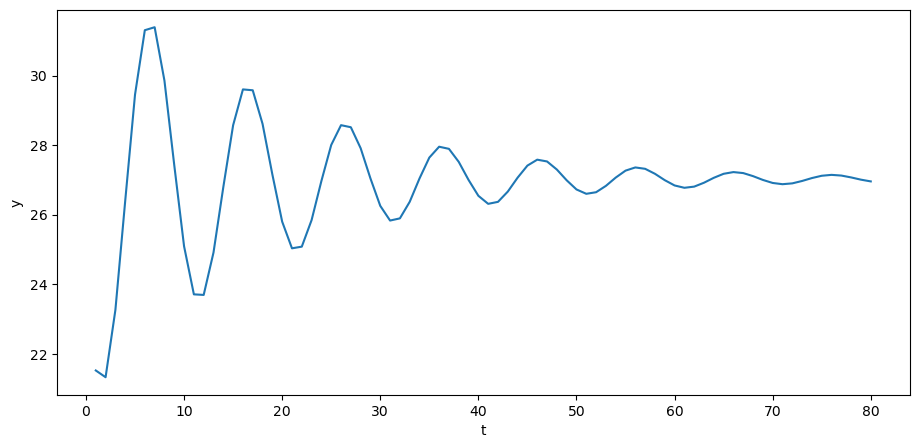

In [9]:
plt.plot(np.arange(T)+1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

通过在{eq}`tswm_1`中设定 $y_t = y_{t-1} = y_{t-2} = y^*$，可以得到 $y_t$ 的 {ref}`*稳态*<scalar-dynam:steady-state>` 值 $y^*$。

$$
y^* = \frac{\alpha_{0}}{1 - \alpha_{1} - \alpha_{2}}
$$

如果我们将初始值设为 $y_{0} = y_{-1} = y^*$，那么 $y_{t}$ 将是恒定的：

In [10]:
y_star = α_0 / (1 - α_1 - α_2)
y_neg1_steady = y_star # y_{-1}
y_0_steady = y_star

b_steady = np.full(T, α_0)
b_steady[0] = α_0 + α_1 * y_0_steady + α_2 * y_neg1_steady
b_steady[1] = α_0 + α_2 * y_0_steady

In [11]:
y_steady = A_inv @ b_steady

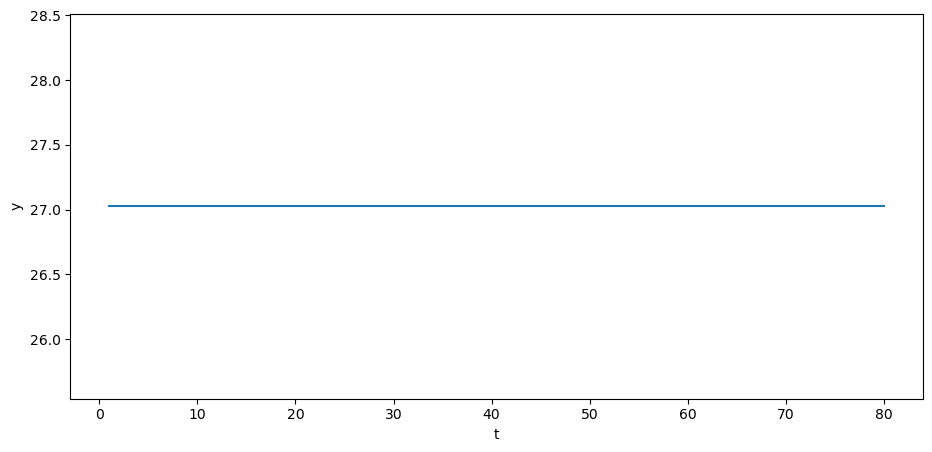

In [12]:
plt.plot(np.arange(T)+1, y_steady)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

## 添加随机项

为了让这个例子有趣一些，我们将遵循经济学家[尤金·斯卢茨基](https://en.wikipedia.org/wiki/Eugen_Slutsky)和[拉格纳·弗里希](https://en.wikipedia.org/wiki/Ragnar_Frisch)的方法，用以下**二阶随机线性差分方程**替换我们原来的二阶差分方程：


```{math}
:label: tswm_2

y_{t} = \alpha_{0} + \alpha_{1} y_{t-1} + \alpha_{2} y_{t-2} + u_t
```

其中 $u_{t} \sim N\left(0, \sigma_{u}^{2}\right)$ 并且是 {ref}`独立同分布<IID-theorem>` -- 相互独立且服从相同分布。

我们将把这些 $T$ 个方程堆叠成一个以矩阵代数表示的系统。

让我们定义随机向量

$$
u=\left[\begin{array}{c}
u_{1}\\
u_{2}\\
\vdots\\
u_{T}
\end{array}\right]
$$

其中 $A, b, y$ 定义如上，现在假设 $y$ 由系统

$$
A y = b + u
$$ (eq:eqar)

所支配

$y$ 的解变为

$$
y = A^{-1} \left(b + u\right)
$$ (eq:eqma)

让我们在Python中尝试一下。

In [13]:
σ_u = 2.
u = np.random.normal(0, σ_u, size=T)
y = A_inv @ (b + u)

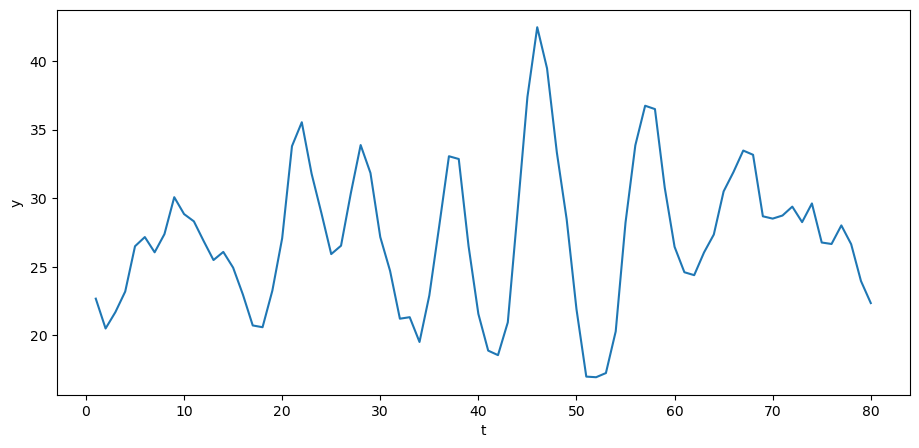

In [14]:
plt.plot(np.arange(T)+1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

上面的时间序列在最近几十年中与很多先进国家（去趋势后的）GDP系列非常相似。

我们可以模拟 $N$ 条路径。

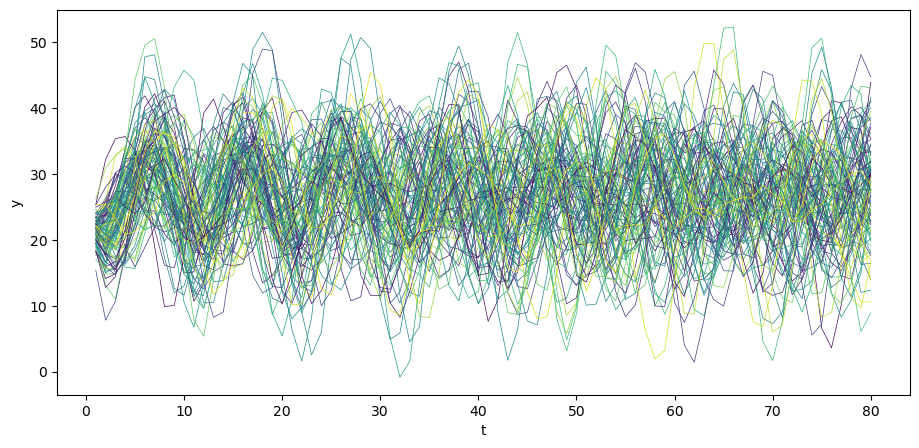

In [15]:
N = 100

for i in range(N):
    col = cm.viridis(np.random.rand())  # 从 viridis 色系中随机选择一种颜色
    u = np.random.normal(0, σ_u, size=T)
    y = A_inv @ (b + u)
    plt.plot(np.arange(T)+1, y, lw=0.5, color=col)

plt.xlabel('t')
plt.ylabel('y')

plt.show()

同样考虑 $y_{0}$ 和 $y_{-1}$ 处于稳态的情况。

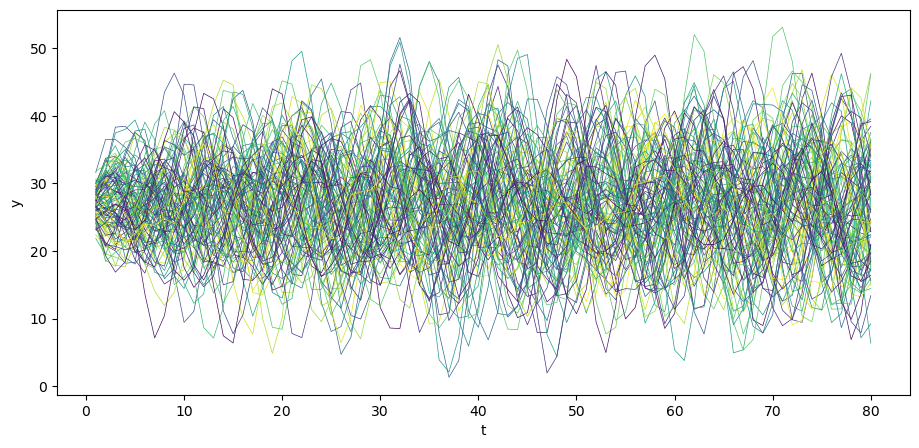

In [16]:
N = 100

for i in range(N):
    col = cm.viridis(np.random.rand())  # 从 viridis 色系中随机选择一种颜色
    u = np.random.normal(0, σ_u, size=T)
    y_steady = A_inv @ (b_steady + u)
    plt.plot(np.arange(T)+1, y_steady, lw=0.5, color=col)

plt.xlabel('t')
plt.ylabel('y')

plt.show()

## 计算总体矩

我们可以应用多元正态分布的标准公式来计算我们的时间序列模型

$$
y = A^{-1} (b + u) .
$$

你可以在这篇讲义中阅读关于多元正态分布的内容 [多元正态分布](https://python.quantecon.org/multivariate_normal.html)。

让我们将我们的模型写为

$$ 
y = \tilde A (b + u)
$$

其中 $\tilde A = A^{-1}$。

因为正态随机变量的线性组合依然是正态的，我们知道

$$
y \sim {\mathcal N}(\mu_y, \Sigma_y)
$$

其中

$$ 
\mu_y = \tilde A b
$$

以及

$$
\Sigma_y = \tilde A (\sigma_u^2 I_{T \times T} ) \tilde A^T
$$

让我们编写一个Python类来计算均值向量 $\mu_y$ 和协方差矩阵 $\Sigma_y$。

In [17]:
class population_moments:
    """
    计算人群矩 mu_y, Sigma_y.
    ---------
    参数:
    alpha0, alpha1, alpha2, T, y_1, y0
    """
    def __init__(self, α_0=10.0, 
                       α_1=1.53, 
                       α_2=-.9, 
                       T=80, 
                       y_neg1=28.0, 
                       y_0=24.0, 
                       σ_u=1):

        # 计算 A
        A = np.identity(T)

        for i in range(T):
            if i-1 >= 0:
                A[i, i-1] = -α_1

            if i-2 >= 0:
                A[i, i-2] = -α_2

        # 计算 b
        b = np.full(T, α_0)
        b[0] = α_0 + α_1 * y_0 + α_2 * y_neg1
        b[1] = α_0 + α_2 * y_0

        # 计算 A 的逆
        A_inv = np.linalg.inv(A)

        self.A, self.b, self.A_inv, self.σ_u, self.T = A, b, A_inv, σ_u, T
    
    def sample_y(self, n):
        """
        提供一个大小为 n 的 y 样本。
        """
        A_inv, σ_u, b, T = self.A_inv, self.σ_u, self.b, self.T
        us = np.random.normal(0, σ_u, size=[n, T])
        ys = np.vstack([A_inv @ (b + u) for u in us])

        return ys

    def get_moments(self):
        """
        计算 y 的总体矩。
        """
        A_inv, σ_u, b = self.A_inv, self.σ_u, self.b

        # 计算 μ_y
        self.μ_y = A_inv @ b
        self.Σ_y = σ_u**2 * (A_inv @ A_inv.T)
        
        return self.μ_y, self.Σ_y


series_process = population_moments()
    
μ_y, Σ_y = series_process.get_moments()
A_inv = series_process.A_inv

研究由各种参数值隐含的 $\mu_y, \Sigma_y$ 是非常有意义的。

此外，我们可以使用该类展示 $y$ 的**统计平稳性**仅在非常特殊的初始条件下成立。

让我们首先生成 $y$ 的 $N$ 次时间实现，并将它们与总体均值 $\mu_y$ 一起绘制出来。

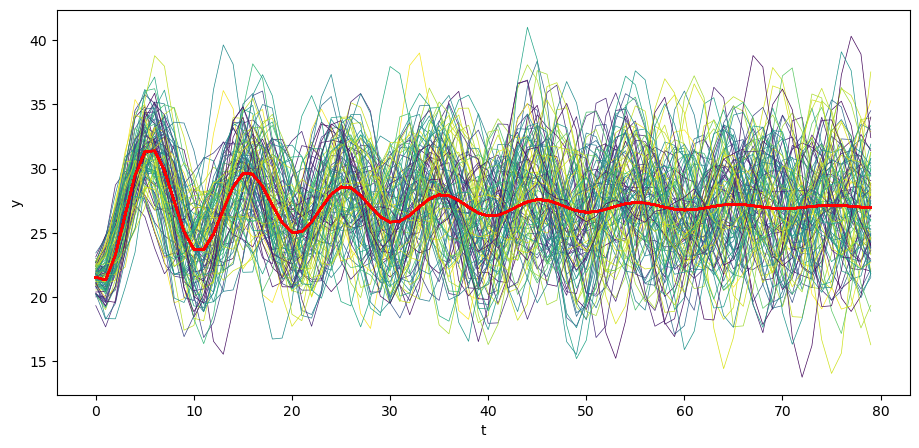

In [18]:
# 绘制均值
N = 100

for i in range(N):
    col = cm.viridis(np.random.rand())  # 从 viridis 色系中随机选择一种颜色
    ys = series_process.sample_y(N)
    plt.plot(ys[i,:], lw=0.5, color=col)
    plt.plot(μ_y, color='red')

plt.xlabel('t')
plt.ylabel('y')

plt.show()

从视觉上看，注意到随着 $t$ 增加，$y_t$ 的各次实现之间的方差在减少。

绘制总体方差 $\Sigma_y$ 对角线。

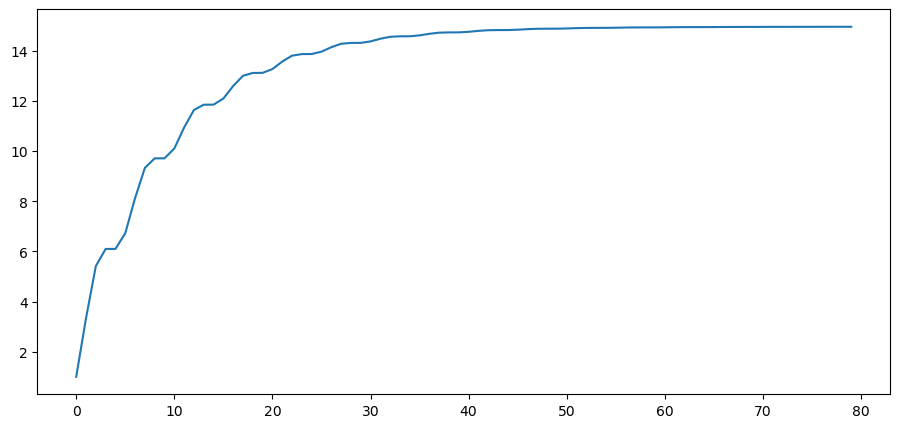

In [19]:
# 绘制方差
plt.plot(Σ_y.diagonal())
plt.show()

注意总体方差如何增加并接近渐近值。

让我们从多个实现中计算样本方差并绘制出来。

In [20]:
series_process = population_moments(α_0=0, 
                                    α_1=.8, 
                                    α_2=0, 
                                    T=6,
                                    y_neg1=0., 
                                    y_0=0., 
                                    σ_u=1)

μ_y, Σ_y = series_process.get_moments()
print("μ_y = ", μ_y)
print("Σ_y = \n", Σ_y)

μ_y =  [0. 0. 0. 0. 0. 0.]
Σ_y = 
 [[1.    0.8   0.64  0.512 0.41  0.328]
 [0.8   1.64  1.312 1.05  0.84  0.672]
 [0.64  1.312 2.05  1.64  1.312 1.049]
 [0.512 1.05  1.64  2.312 1.849 1.48 ]
 [0.41  0.84  1.312 1.849 2.48  1.984]
 [0.328 0.672 1.049 1.48  1.984 2.587]]


注意 $y_t$ 和 $y_{t-1}$ 之间的协方差——即超对角线上的元素——并*不*相同。

这表明由 $y$ 向量表示的时间序列并非**平稳**。

为了使其平稳，我们必须改变系统，使得*初始条件* $(y_0, y_{-1})$ 不再是固定的数值，而是一个具有特定均值和协方差矩阵的联合正态分布随机向量。

我们在[线性状态空间模型](https://python.quantecon.org/linear_models.html)中描述了如何实现这一点。

但为了为分析做好铺垫，接下来我们打印出 $\Sigma_y$ 的右下角。

In [21]:
series_process = population_moments()
μ_y, Σ_y = series_process.get_moments()

print("bottom right corner of Σ_y = \n", Σ_y[72:,72:])

bottom right corner of Σ_y = 
 [[ 14.965  12.051   4.969  -3.243  -9.434 -11.515  -9.128  -3.602]
 [ 12.051  14.965  12.051   4.969  -3.243  -9.434 -11.515  -9.128]
 [  4.969  12.051  14.966  12.051   4.97   -3.243  -9.434 -11.516]
 [ -3.243   4.969  12.051  14.966  12.052   4.97   -3.243  -9.434]
 [ -9.434  -3.243   4.97   12.052  14.967  12.053   4.97   -3.243]
 [-11.515  -9.434  -3.243   4.97   12.053  14.968  12.053   4.97 ]
 [ -9.128 -11.515  -9.434  -3.243   4.97   12.053  14.968  12.053]
 [ -3.602  -9.128 -11.516  -9.434  -3.243   4.97   12.053  14.968]]


注意 $y_t$ 和 $y_{t-1}$ 之间的协方差——即超对角线上的元素——并*不*相同。

这表明由 $y$ 向量表示的时间序列并非**平稳**。

为了使其平稳，我们必须改变系统，使得*初始条件* $(y_0, y_{-1})$ 不再是固定的数值，而是一个具有特定均值和协方差矩阵的联合正态分布随机向量。

我们在[线性状态空间模型](https://python.quantecon.org/linear_models.html)中描述了如何实现这一点。

但为了为分析做好铺垫，接下来我们打印出 $\Sigma_y$ 的右下角。

## 移动平均表示

让我们打印出 $A^{-1}$ 并观察其结构

  * 它是三角形矩阵、接近三角形，还是其他形式 $\ldots$？

为了研究 $A^{-1}$ 的结构，我们将只打印到小数点后三位。

首先让我们打印出 $A^{-1}$ 的左上角部分。

In [22]:
print(A_inv[0:7,0:7])

[[ 1.     0.    -0.    -0.     0.    -0.    -0.   ]
 [ 1.53   1.    -0.    -0.     0.    -0.    -0.   ]
 [ 1.441  1.53   1.     0.     0.     0.     0.   ]
 [ 0.828  1.441  1.53   1.     0.     0.     0.   ]
 [-0.031  0.828  1.441  1.53   1.    -0.    -0.   ]
 [-0.792 -0.031  0.828  1.441  1.53   1.     0.   ]
 [-1.184 -0.792 -0.031  0.828  1.441  1.53   1.   ]]


显然，$A^{-1}$ 是一个下三角矩阵。

注意每一行的结尾都与前一行的前对角线元素相同。

由于 $A^{-1}$ 是下三角矩阵，每一行代表特定 $t$ 时的 $y_t$，作为以下两部分之和：

- 与初始条件 $b$ 相关的时间依赖函数 $A^{-1} b$，以及
- 当前和过去 IID 冲击 $\{u_t\}$ 的加权和。

因此，设 $\tilde{A}=A^{-1}$。

显然，对于 $t\geq0$，

$$
y_{t+1}=\sum_{i=1}^{t+1}\tilde{A}_{t+1,i}b_{i}+\sum_{i=1}^{t}\tilde{A}_{t+1,i}u_{i}+u_{t+1}
$$

这是一个具有时间变化系数的**移动平均**表示。

正如系统 {eq}`eq:eqma` 构成了 $y$ 的**移动平均**表示，系统 {eq}`eq:eqar` 构成了 $y$ 的**自回归**表示。

## 一个前瞻性模型

萨缪尔森的模型是*后视*的，因为我们给它*初始条件*并让它运行。

现在我们转向一个*前瞻性*模型。

我们应用类似的线性代数工具来研究一个广泛用作宏观经济学和金融学基准的*完美预见*模型。

例如，假设 $p_t$ 是股票价格，$y_t$ 是其股息。

我们假设 $y_t$ 由我们刚刚分析的二阶差分方程确定，因此

$$
y = A^{-1} \left(b + u\right)
$$

我们的*完美预见*股票价格模型是

$$
p_{t} = \sum_{j=0}^{T-t} \beta^{j} y_{t+j}, \quad \beta \in (0,1)
$$

其中 $\beta$ 是折现因子。

该模型断言，在 $t$ 时股票的价格等于（完美预见的）未来股息的折现现值之和


$$
\underset{\equiv p}{\underbrace{\left[\begin{array}{c}
p_{1}\\
p_{2}\\
p_{3}\\
\vdots\\
p_{T}
\end{array}\right]}}=\underset{\equiv B}{\underbrace{\left[\begin{array}{ccccc}
1 & \beta & \beta^{2} & \cdots & \beta^{T-1}\\
0 & 1 & \beta & \cdots & \beta^{T-2}\\
0 & 0 & 1 & \cdots & \beta^{T-3}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 1
\end{array}\right]}}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
\vdots\\
y_{T}
\end{array}\right]
$$

In [23]:
β = .96

In [24]:
# construct B
B = np.zeros((T, T))

for i in range(T):
    B[i, i:] = β ** np.arange(0, T-i)

In [25]:
print(B)

[[1.    0.96  0.922 ... 0.043 0.041 0.04 ]
 [0.    1.    0.96  ... 0.045 0.043 0.041]
 [0.    0.    1.    ... 0.047 0.045 0.043]
 ...
 [0.    0.    0.    ... 1.    0.96  0.922]
 [0.    0.    0.    ... 0.    1.    0.96 ]
 [0.    0.    0.    ... 0.    0.    1.   ]]


In [26]:
σ_u = 0.
u = np.random.normal(0, σ_u, size=T)
y = A_inv @ (b + u)
y_steady = A_inv @ (b_steady + u)

In [27]:
p = B @ y

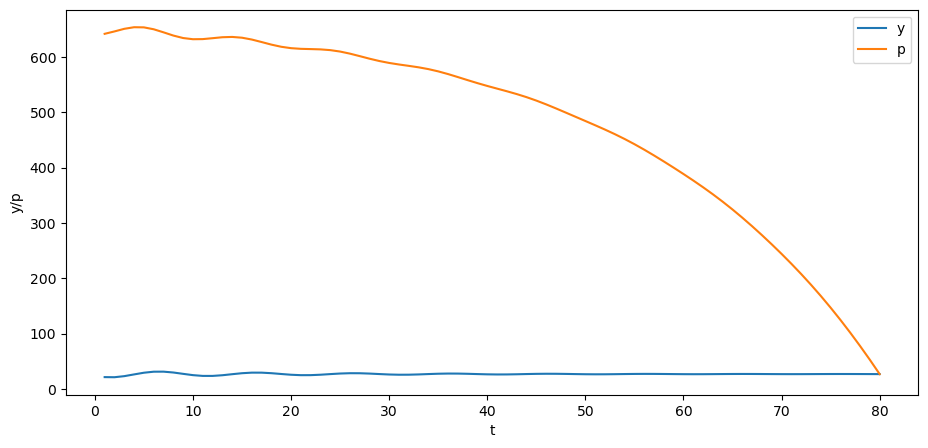

In [28]:
plt.plot(np.arange(0, T)+1, y, label='y')
plt.plot(np.arange(0, T)+1, p, label='p')
plt.xlabel('t')
plt.ylabel('y/p')
plt.legend()

plt.show()

你能解释一下为什么价格的趋势在随时间下降吗？

接下来还可以考虑当 $y_{0}$ 和 $y_{-1}$ 处于稳态时的情况。

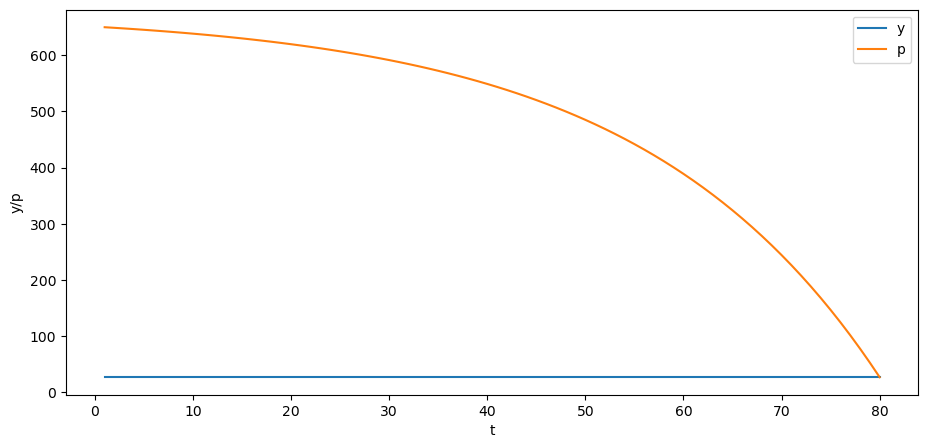

In [29]:
p_steady = B @ y_steady

plt.plot(np.arange(0, T)+1, y_steady, label='y')
plt.plot(np.arange(0, T)+1, p_steady, label='p')
plt.xlabel('t')
plt.ylabel('y/p')
plt.legend()

plt.show()